# Part-1

In [1]:
import pandas as pd
import numpy as np

In [2]:
fifteenMnts = 900  # 15 * 60 idel time calculation
df=pd.read_csv('clickStream.csv')


'''
below code sorts the input data on user id and activity time.
this step is ensure we careate session of every user and new session if ideal time is greater than 15 mnts
'''

In [3]:
df=df.sort_values(by=['uuid','clicked_epoch'])
df

,clicked_epoch,uuid,date,price,product_id,category
148902,1.521398e+09,1,2018-03-19,990.00,50615,bluetooth speakers
192495,1.527050e+09,1,2018-05-23,2649.00,9739,mixers & grinders
105111,1.515089e+09,2,2018-01-04,799.00,10258,kurta & kurtis
94553,1.513780e+09,3,2017-12-20,449.50,75105,t-shirts
94554,1.513780e+09,3,2017-12-20,449.50,57614,t-shirts
94555,1.513780e+09,3,2017-12-20,545.54,158931,tops and tees
111605,1.515570e+09,3,2018-01-10,199.00,142632,flip flop
141853,1.520246e+09,3,2018-03-05,399.00,125047,ethnic bottom
141854,1.520246e+09,3,2018-03-05,698.00,133314,kurta & kurtis
141855,1.520246e+09,3,2018-03-05,799.00,103386,kurta & kurtis


In [4]:
'''
find out if the 
    01. user id is different than presious row
    02. if the user id of previous and current row is same and activity time different is greater than 15 mnts
    if either of the above is true create new session id otherwise reatain the existing session id
'''

'\nfind out if the \n    01. user id is different than presious row\n    02. if the user id of previous and current row is same and activity time different is greater than 15 mnts\n    if either of the above is true create new session id otherwise reatain the existing session id\n'

In [5]:
df['uid_diff'] = df.uuid == df.uuid.shift()
df['Previous_epoch'] = df.groupby('uuid')['clicked_epoch'].shift()
df['session time'] = df['clicked_epoch']-df['Previous_epoch'] 
df['session_id'] = (( (df['clicked_epoch']-df['Previous_epoch'] > 900) | (df['uid_diff']==False) )).cumsum()
df

,clicked_epoch,uuid,date,price,product_id,category,uid_diff,Previous_epoch,session time,session_id
148902,1.521398e+09,1,2018-03-19,990.00,50615,bluetooth speakers,False,NaN,NaN,1
192495,1.527050e+09,1,2018-05-23,2649.00,9739,mixers & grinders,True,1.521398e+09,5651999.0,2
105111,1.515089e+09,2,2018-01-04,799.00,10258,kurta & kurtis,False,NaN,NaN,3
94553,1.513780e+09,3,2017-12-20,449.50,75105,t-shirts,False,NaN,NaN,4
94554,1.513780e+09,3,2017-12-20,449.50,57614,t-shirts,True,1.513780e+09,0.0,4
94555,1.513780e+09,3,2017-12-20,545.54,158931,tops and tees,True,1.513780e+09,0.0,4
111605,1.515570e+09,3,2018-01-10,199.00,142632,flip flop,True,1.513780e+09,1789787.0,5
141853,1.520246e+09,3,2018-03-05,399.00,125047,ethnic bottom,True,1.515570e+09,4676235.0,6
141854,1.520246e+09,3,2018-03-05,698.00,133314,kurta & kurtis,True,1.520246e+09,0.0,6
141855,1.520246e+09,3,2018-03-05,799.00,103386,kurta & kurtis,True,1.520246e+09,0.0,6


In [6]:
df['activity_time'] = pd.to_datetime(df['clicked_epoch'],unit='s').dt.strftime('%d/%m/%Y %X')
df

,clicked_epoch,uuid,date,price,product_id,category,uid_diff,Previous_epoch,session time,session_id,activity_time
148902,1.521398e+09,1,2018-03-19,990.00,50615,bluetooth speakers,False,NaN,NaN,1,18/03/2018 18:39:30
192495,1.527050e+09,1,2018-05-23,2649.00,9739,mixers & grinders,True,1.521398e+09,5651999.0,2,23/05/2018 04:39:29
105111,1.515089e+09,2,2018-01-04,799.00,10258,kurta & kurtis,False,NaN,NaN,3,04/01/2018 18:03:23
94553,1.513780e+09,3,2017-12-20,449.50,75105,t-shirts,False,NaN,NaN,4,20/12/2017 14:27:06
94554,1.513780e+09,3,2017-12-20,449.50,57614,t-shirts,True,1.513780e+09,0.0,4,20/12/2017 14:27:06
94555,1.513780e+09,3,2017-12-20,545.54,158931,tops and tees,True,1.513780e+09,0.0,4,20/12/2017 14:27:06
111605,1.515570e+09,3,2018-01-10,199.00,142632,flip flop,True,1.513780e+09,1789787.0,5,10/01/2018 07:36:53
141853,1.520246e+09,3,2018-03-05,399.00,125047,ethnic bottom,True,1.515570e+09,4676235.0,6,05/03/2018 10:34:08
141854,1.520246e+09,3,2018-03-05,698.00,133314,kurta & kurtis,True,1.520246e+09,0.0,6,05/03/2018 10:34:08
141855,1.520246e+09,3,2018-03-05,799.00,103386,kurta & kurtis,True,1.520246e+09,0.0,6,05/03/2018 10:34:08


In [7]:
#df=df.drop(['Previous_epoch','uid_diff','session time','clicked_epoch'],axis=1)
df=df[['activity_time','uuid','date','price','product_id','category','session_id']]
df.rename(columns={'activity_time': 'Activity Time', 'uuid': 'User Id', 'date': 'Date of Activity'}, inplace=True)
df=df.reset_index(drop=True)
df

/home/kiran/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,Activity Time,User Id,Date of Activity,price,product_id,category,session_id
0,18/03/2018 18:39:30,1,2018-03-19,990.00,50615,bluetooth speakers,1
1,23/05/2018 04:39:29,1,2018-05-23,2649.00,9739,mixers & grinders,2
2,04/01/2018 18:03:23,2,2018-01-04,799.00,10258,kurta & kurtis,3
3,20/12/2017 14:27:06,3,2017-12-20,449.50,75105,t-shirts,4
4,20/12/2017 14:27:06,3,2017-12-20,449.50,57614,t-shirts,4
5,20/12/2017 14:27:06,3,2017-12-20,545.54,158931,tops and tees,4
6,10/01/2018 07:36:53,3,2018-01-10,199.00,142632,flip flop,5
7,05/03/2018 10:34:08,3,2018-03-05,399.00,125047,ethnic bottom,6
8,05/03/2018 10:34:08,3,2018-03-05,698.00,133314,kurta & kurtis,6
9,05/03/2018 10:34:08,3,2018-03-05,799.00,103386,kurta & kurtis,6


# Part -2

In [39]:
from time import clock
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
start=clock()
part2=pd.read_csv('transactions.csv')
part2['date']=pd.to_datetime(part2['date'])

In [40]:
a=part2.category.unique()
a

array(['Casual Dress', 'Pullover Sweater', 'Sleeveless Blouse',
       'Fleece Jacket'], dtype=object)

In [41]:
'''extracting each unique category and assiging them to individual dataframe with subscript [a,b,c,d]'''

'extracting each unique category and assiging them to individual dataframe with subscript [a,b,c,d]'

In [42]:
part2a=part2[part2['category']==a[0]]
part2a['month']=part2a['date'].dt.month

In [43]:
part2a.head()

,transaction_id,product_id,category,date,month
0,1,662685,Casual Dress,2017-10-01,10
1,2,154881,Casual Dress,2017-10-01,10
2,3,220036,Casual Dress,2017-10-01,10
3,4,220036,Casual Dress,2017-10-01,10
6,7,825129,Casual Dress,2017-10-01,10


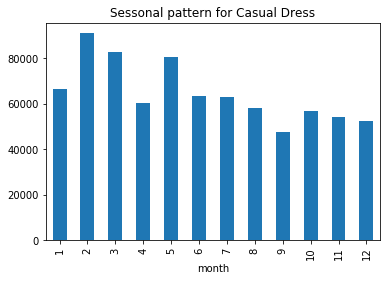

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.title('Sessonal pattern for Casual Dress')
part2a.groupby('month')['category'].count().plot.bar();



In [45]:
part2b=part2[part2['category']==a[1]]
part2b['month']=part2b['date'].dt.month


In [46]:
part2b.head()

,transaction_id,product_id,category,date,month
4,5,950839,Pullover Sweater,2017-10-01,10
5,6,711818,Pullover Sweater,2017-10-01,10
7,8,881500,Pullover Sweater,2017-10-01,10
8,9,120069,Pullover Sweater,2017-10-01,10
11,12,790404,Pullover Sweater,2017-10-01,10


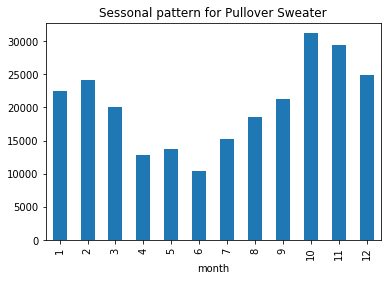

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.title('Sessonal pattern for Pullover Sweater')
part2b.groupby('month')['category'].count().plot.bar();


In [48]:
part2c=part2[part2['category']==a[2]]
part2c['month']=part2c['date'].dt.month


In [49]:
part2c.head()

,transaction_id,product_id,category,date,month
9,10,935727,Sleeveless Blouse,2017-10-01,10
10,11,20987,Sleeveless Blouse,2017-10-01,10
40,41,165248,Sleeveless Blouse,2017-10-01,10
42,43,700943,Sleeveless Blouse,2017-10-01,10
45,46,336162,Sleeveless Blouse,2017-10-01,10


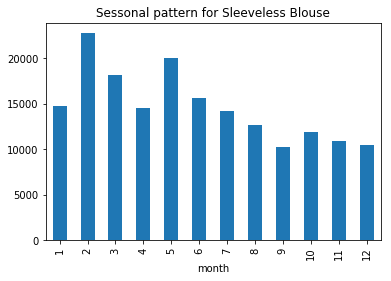

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.title('Sessonal pattern for Sleeveless Blouse')
part2c.groupby('month')['category'].count().plot.bar();


In [51]:
part2d=part2[part2['category']==a[3]]
part2d['month']=part2d['date'].dt.month


In [52]:
part2d.head()

,transaction_id,product_id,category,date,month
12,13,188834,Fleece Jacket,2017-10-01,10
55,56,329328,Fleece Jacket,2017-10-01,10
73,74,1021782,Fleece Jacket,2017-10-01,10
86,87,737670,Fleece Jacket,2017-10-01,10
183,184,190165,Fleece Jacket,2017-10-01,10


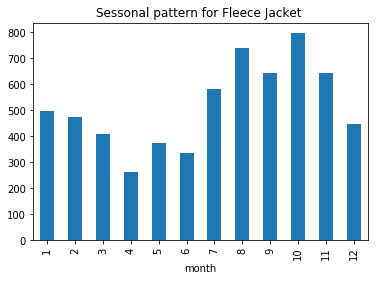

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.title('Sessonal pattern for Fleece Jacket ')
part2d.groupby('month')['category'].count().plot.bar();


In [23]:
'''Seasonal score  for each category for each month by applying correlation'''

'Seasonal score  for each category for each month by applying correlation'

In [54]:
aq=list(part2a.groupby('month')['category'].count())
newList = [x / sum(aq) for x in aq]
df11=pd.DataFrame(newList,columns=['relevance score for casual dress'])
df11.insert(0, 'Months', range(1, 1 + len(df11)))
df11

,Months,relevance score for casual dress
0,1,0.085790
1,2,0.117343
2,3,0.106444
3,4,0.077790
4,5,0.103606
5,6,0.081572
6,7,0.080919
7,8,0.074847
8,9,0.061062
9,10,0.073322


In [55]:
aq2=list(part2b.groupby('month')['category'].count())
newList = [x / sum(aq2) for x in aq2]
df12=pd.DataFrame(newList,columns=['relevance score for Pullover sweater'])
df12.insert(0, 'Months', range(1, 1 + len(df12)))
df12

,Months,relevance score for Pullover sweater
0,1,0.092099
1,2,0.098769
2,3,0.082119
3,4,0.052791
4,5,0.056257
5,6,0.042426
6,7,0.062348
7,8,0.076077
8,9,0.087027
9,10,0.127978


In [56]:
aq3=list(part2c.groupby('month')['category'].count())
newList = [x / sum(aq3) for x in aq3]
df13=pd.DataFrame(newList,columns=['relevance score for Sleevless Blouse '])
df13.insert(0, 'Months', range(1, 1 + len(df13)))
df13

,Months,relevance score for Sleevless Blouse
0,1,0.083416
1,2,0.129337
2,3,0.103329
3,4,0.082518
4,5,0.113477
5,6,0.088447
6,7,0.080625
7,8,0.071928
8,9,0.057966
9,10,0.067312


In [57]:
aq4=list(part2d.groupby('month')['category'].count())
newList = [x / sum(aq4) for x in aq4]
df14=pd.DataFrame(newList,columns=['relevance score for Fleece Jacket'])
df14.insert(0, 'Months', range(1, 1 + len(df14)))
df14

,Months,relevance score for Fleece Jacket
0,1,0.080219
1,2,0.076353
2,3,0.065561
3,4,0.042043
4,5,0.060245
5,6,0.054124
6,7,0.093589
7,8,0.119201
8,9,0.103898
9,10,0.128544


In [58]:
end=clock()
elapsed_time=end-start
print("elapsed time ",elapsed_time)

elapsed time  3.1835590000000025


In [59]:
a

array(['Casual Dress', 'Pullover Sweater', 'Sleeveless Blouse',
       'Fleece Jacket'], dtype=object)

Casual Dress


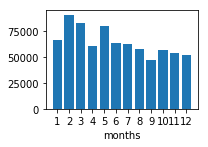

    Months  relevance score
0        1         0.085790
1        2         0.117343
2        3         0.106444
3        4         0.077790
4        5         0.103606
5        6         0.081572
6        7         0.080919
7        8         0.074847
8        9         0.061062
9       10         0.073322
10      11         0.069938
11      12         0.067369



Pullover Sweater


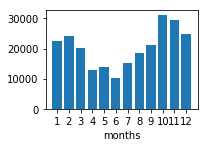

    Months  relevance score
0        1         0.092099
1        2         0.098769
2        3         0.082119
3        4         0.052791
4        5         0.056257
5        6         0.042426
6        7         0.062348
7        8         0.076077
8        9         0.087027
9       10         0.127978
10      11         0.120256
11      12         0.101853



Sleeveless Blouse


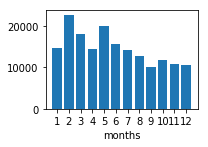

    Months  relevance score
0        1         0.083416
1        2         0.129337
2        3         0.103329
3        4         0.082518
4        5         0.113477
5        6         0.088447
6        7         0.080625
7        8         0.071928
8        9         0.057966
9       10         0.067312
10      11         0.062065
11      12         0.059581



Fleece Jacket


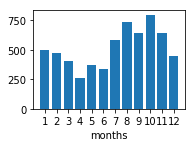

    Months  relevance score
0        1         0.080219
1        2         0.076353
2        3         0.065561
3        4         0.042043
4        5         0.060245
5        6         0.054124
6        7         0.093589
7        8         0.119201
8        9         0.103898
9       10         0.128544
10      11         0.103898
11      12         0.072326





In [64]:
aq=[]
import matplotlib.pyplot as plt
%matplotlib inline
fig=plt.figure()
for x in range(len(a)):
    i=1
    part2ax=part2[part2['category']==a[x]]
    part2ax['month']=part2['date'].dt.month
    aq.append(part2ax)
    plt.title(a[x])
    print(a[x])
    plt.subplot(2,2,i)
    i=i+1
    plt.bar(np.arange(1,13),part2ax.groupby('month')['category'].count())
    plt.xticks(np.arange(1,13))
    plt.xlabel('months')
    plt.show()
    #plt.figure(part2ax.groupby('month')['category'].count().plot.bar())
    #part2ax.groupby('month')['category'].count().plot.bar().
    aq4=list(part2ax.groupby('month')['category'].count())
    newList = [x / sum(aq4) for x in aq4]
    df14=pd.DataFrame(newList,columns=['relevance score'])
    df14.insert(0, 'Months', range(1, 1 + len(df14)))
    print(df14)
    print("\n\n")